## Analyzing medical
### Insurance Forecast by using Neural Network
#### not using linear regression but NN
This medical cost dataset is available from Kaggle
https://www.kaggle.com/datasets/mirichoi0218/insurance
https://github.com/stedy/Machine-Learning-with-R-datasets
This the url:  https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv

Columns of the dataset

* age: age of primary beneficiary
* sex: insurance contractor gender, female, male
* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
* children: Number of children covered by health insurance / Number of dependents
* smoker: Smoking
* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
*  charges: Individual medical costs billed by health insurance


We try to **predict** what someone medical insurance **paybill** will be based on the information we have.
So we try to predict a number based on other number: a regression problem.





In [403]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
print(tf.__version__)
print(np.__version__)
print(pd.__version__)
print(sk.__version__)

2.9.0
1.22.4
1.4.2
1.1.1


In [404]:
insurance_db = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance_db.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [405]:
insurance_db.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'bmi'}>],
       [<AxesSubplot: title={'center': 'children'}>,
        <AxesSubplot: title={'center': 'charges'}>]], dtype=object)

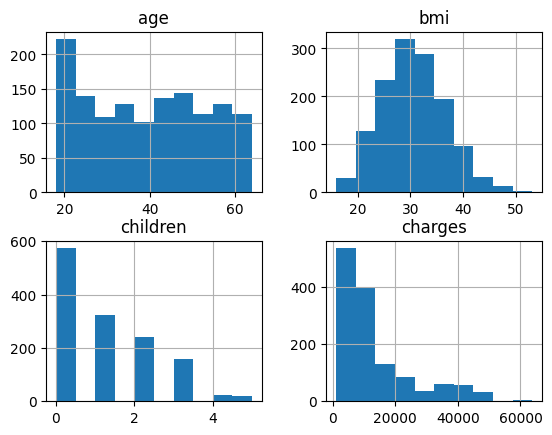

In [406]:
insurance_db.hist()

## take a look to the features we have
* sex, region, smokers have to be converted in digestable feature for the model
* age , bmi, children and charges must be normalized

Before we can pass to the model we have to numerical encode the **input features**

In [407]:
insurance_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## one hot simple technic is used to turn categorical values into numeric values
<br>
<img src="stuff/onehotencoding.png" height = "300" >
</br>


In [408]:
# let's try one hot encode so it all numbers
insurance_features = pd.get_dummies(insurance_db)
insurance_features.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


So now
* create the **features** (X)  and **labels** (Y) values
* then create **training** and **validation**
* then create a **neural network**

In [409]:
# Create the features and the labels
X = insurance_features.drop(labels="charges", axis=1)
Y = insurance_features[["charges"]]
display(X[:5])
display(Y[:5])

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [410]:
# create a training and test set
from  sklearn.model_selection import train_test_split
X_train, X_test , Y_train, Y_test = train_test_split(X,Y,test_size=0.20, shuffle=True, random_state=888)
len(X), X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

(1338, (1070, 11), (268, 11), (1070, 1), (268, 1))

## building a model


In [411]:
tf.random.set_seed(888)

#create the model
model_insurance = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation ="relu"),
    tf.keras.layers.Dense(1)
], name = "model_insurance_1" )


In [412]:
#compile the module
model_insurance.compile(
    loss= tf.keras.losses.mae,
    optimizer= tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)


we have 6144 param =
512 neuron x 11 features + 512 bias

In [413]:
model_insurance.fit(X_train,Y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 8965.8584 - mae: 8965.8584
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7894.2559 - mae: 7894.2559
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7900.8765 - mae: 7900.8765
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7754.1069 - mae: 7754.1069
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7752.0933 - mae: 7752.0933
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7805.1440 - mae: 7805.1440
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7869.8784 - mae: 7869.8784
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7890.6216 - mae: 7890.6216
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7972.1689 - mae: 7972.1689
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7950.2104 - mae: 7950.2104

In [414]:
model_insurance.summary()

Model: "model_insurance_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_155 (Dense)           (None, 512)               6144      
                                                                 
 dense_156 (Dense)           (None, 1)                 513       
                                                                 
Total params: 6,657
Trainable params: 6,657
Non-trainable params: 0
_________________________________________________________________


Now evaluate on the test data


In [415]:
#check the result of the insurance model on the test data
predictions = model_insurance.predict(X_test)

9/9 [==============================] - 0s 1ms/step


In [416]:
type(predictions)

numpy.ndarray

In [417]:
model_insurance.evaluate(X_test,Y_test)

9/9 [==============================] - 0s 1ms/step - loss: 8009.0176 - mae: 8009.0176


[8009.017578125, 8009.017578125]

well, in the test set is performing a **mae** of 8.009
but in the trainig set the **mae** was  7431.7998

This mae is telling us that by mean the model is wrong on that 8k
Well is this number large compared to the others numbers?




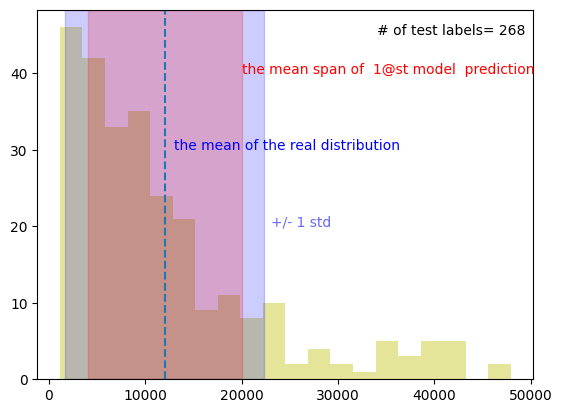

In [418]:
Y_test_mean=int(Y_test.mean())
Y_test_std=int(Y_test.std())

plt.hist(Y_test, bins=20, alpha=0.4, color='y')
plt.axvline(Y_test_mean, linestyle = '--')
plt.text(20000, 40, "the mean span of  1@st model  prediction", color='r')
plt.text(13000, 30, "the mean of the real distribution", color='b')
plt.text(34000, 45, f"# of test labels= {len(Y_test)}")
plt.text(23000, 20, "+/- 1 std ", color='b', alpha=0.6)
plt.axvspan( Y_test_mean - Y_test_std,Y_test_mean+Y_test_std, color='b', alpha=0.2 )
plt.axvspan( Y_test_mean - 8009,Y_test_mean+8009, color='r', alpha=0.2 )
plt.show()
#plot the  labels




the model is **substantially wrong**!

Just for fun lest see the prediction on the training set


34/34 [==============================] - 0s 967us/step


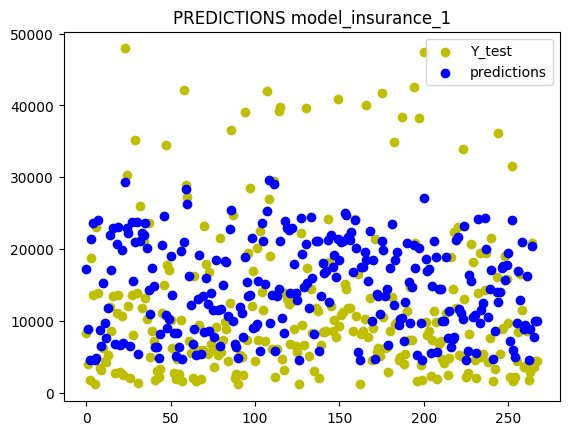

Model: "model_insurance_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_155 (Dense)           (None, 512)               6144      
                                                                 
 dense_156 (Dense)           (None, 1)                 513       
                                                                 
Total params: 6,657
Trainable params: 6,657
Non-trainable params: 0
_________________________________________________________________


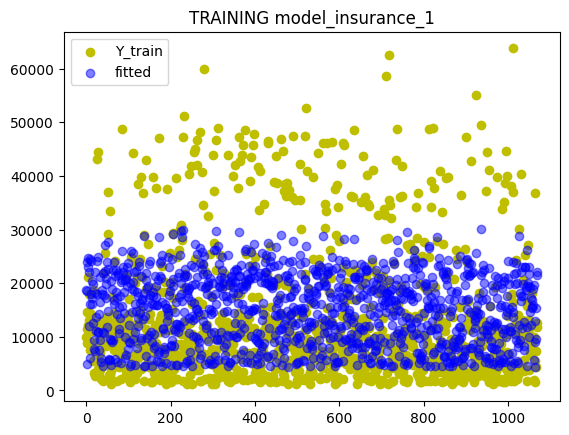

In [419]:
def plot_labels(model_x ):
    predicted = model_x.predict(X_test)
    fitted = model_x.predict(X_train)
    plt.title(f"PREDICTIONS {model_x.name}")
    plt.scatter(np.arange(0,len(Y_test)), Y_test, c='y' , label = 'Y_test')
    plt.scatter(np.nonzero(predicted)[0], predicted, c='b' , label = 'predictions')
    plt.legend()
    plt.show()
    model_x.summary()
    plt.title(f"TRAINING {model_x.name}")
    plt.scatter(np.arange(0,len(Y_train)), Y_train, c='y' ,label = 'Y_train')
    plt.scatter(np.nonzero(fitted)[0], fitted, c='b' , label = 'fitted', alpha=0.5)
    plt.legend()
    plt.show()

plot_labels(model_insurance)

Model is **not doing very well** at all!

## let's try to increment performance
Just to keep simple we can try to
1. Add an extra layer
2. Train for longer

#### A. start with a simple model

In [420]:
tf.random.set_seed(888)

model_insurance_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(124),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
]
)
model_insurance_10.compile(
    loss= tf.keras.losses.mae,
    optimizer= tf.keras.optimizers.SGD(),
    metrics= ["mae"]
)

model_insurance_10.fit(X_train,Y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: nan - mae: nan          
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 11/100
34/34 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 12/100
34/34 [

#### B. **nan** in not a good result, seems that the model is going diverging a lot
Now try this, **add the activation**

In [421]:

tf.random.set_seed(888)

model_insurance_11 = tf.keras.Sequential([
    tf.keras.layers.Dense(124, activation = "relu"),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
]
)
model_insurance_11.compile(
    loss= tf.keras.losses.mae,
    optimizer= tf.keras.optimizers.SGD(),
    metrics= ["mae"]
)

model_insurance_11.fit(X_train,Y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 997us/step - loss: 30512.9082 - mae: 30512.9082
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 9361.6572 - mae: 9361.6572
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 8749.3232 - mae: 8749.3232
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 8650.0420 - mae: 8650.0420
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 8629.0098 - mae: 8629.0098
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 8626.1631 - mae: 8626.1631
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 8625.2246 - mae: 8625.2246
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 8625.3213 - mae: 8625.3213
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 8625.9609 - mae: 8625.9609
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 8625.9863 - mae: 8625.

### C. No is same as before with 1 layer
Try with a new optimizer

In [422]:
tf.random.set_seed(888)

model_insurance_12 = tf.keras.Sequential([
    tf.keras.layers.Dense(124,activation='relu'),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
]
)
model_insurance_12.compile(
    loss= tf.keras.losses.mae,
    optimizer= tf.keras.optimizers.Adam(),
    metrics= ["mae"]
)

model_insurance_12.fit(X_train,Y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 2s 1ms/step - loss: 13547.7871 - mae: 13547.7871
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 13433.8105 - mae: 13433.8105
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 13184.6602 - mae: 13184.6602
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12690.6680 - mae: 12690.6680
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 11833.9102 - mae: 11833.9102
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 10609.0078 - mae: 10609.0078
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 9261.6133 - mae: 9261.6133
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 8235.4814 - mae: 8235.4814
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7800.6196 - mae: 7800.6196
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7713.0205 - ma

#### D. add second activation

In [423]:
tf.random.set_seed(888)

model_insurance_13 = tf.keras.Sequential([
    tf.keras.layers.Dense(124,activation='relu'),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
]
)
model_insurance_13.compile(
    loss= tf.keras.losses.mae,
    optimizer= tf.keras.optimizers.Adam(),
    metrics= ["mae"]
)

model_insurance_13.fit(X_train,Y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 13563.3086 - mae: 13563.3086
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 13506.9697 - mae: 13506.9697
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 13399.6133 - mae: 13399.6133
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 13198.4473 - mae: 13198.4473
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 12856.3379 - mae: 12856.3379
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 12320.5469 - mae: 12320.5469
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 11557.2236 - mae: 11557.2236
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 10615.7461 - mae: 10615.7461
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 9619.1436 - mae: 9619.1436
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 8729.8076 

#### E. lets increment the neuros

In [424]:
tf.random.set_seed(888)

model_insurance_14 = tf.keras.Sequential([
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(124, activation="relu"),
    tf.keras.layers.Dense(1)
]
)
model_insurance_14.compile(
    loss= tf.keras.losses.mae,
    optimizer= tf.keras.optimizers.Adam(),
    metrics= ["mae"]
)

history_14 = model_insurance_14.fit(X_train,Y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 13481.3135 - mae: 13481.3135
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 12741.5576 - mae: 12741.5576
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 10282.9014 - mae: 10282.9014
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7946.2578 - mae: 7946.2578
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7693.5322 - mae: 7693.5322
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7637.4893 - mae: 7637.4893
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7589.9731 - mae: 7589.9731
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7539.5664 - mae: 7539.5664
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7476.3545 - mae: 7476.3545
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7415.7441 - mae: 741

34/34 [==============================] - 0s 997us/step


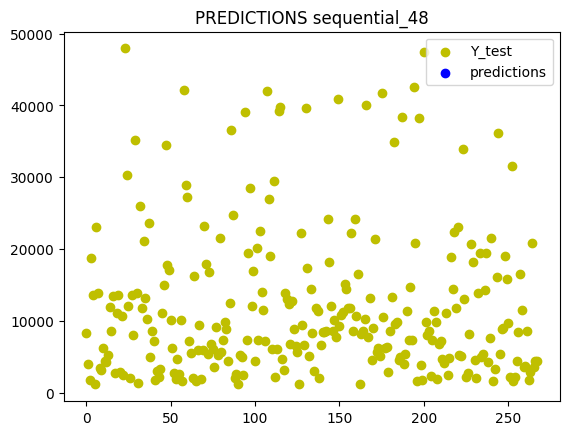

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_157 (Dense)           (None, 124)               1488      
                                                                 
 dense_158 (Dense)           (None, 10)                1250      
                                                                 
 dense_159 (Dense)           (None, 1)                 11        
                                                                 
Total params: 2,749
Trainable params: 2,749
Non-trainable params: 0
_________________________________________________________________


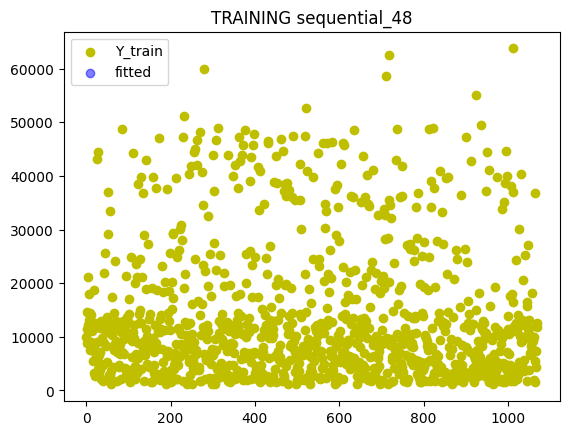

34/34 [==============================] - 0s 2ms/step


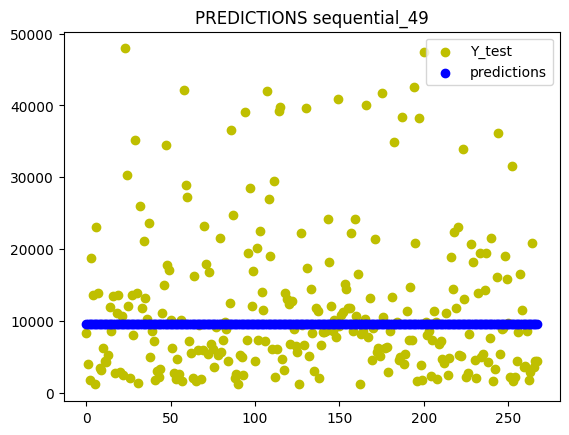

Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_160 (Dense)           (None, 124)               1488      
                                                                 
 dense_161 (Dense)           (None, 10)                1250      
                                                                 
 dense_162 (Dense)           (None, 1)                 11        
                                                                 
Total params: 2,749
Trainable params: 2,749
Non-trainable params: 0
_________________________________________________________________


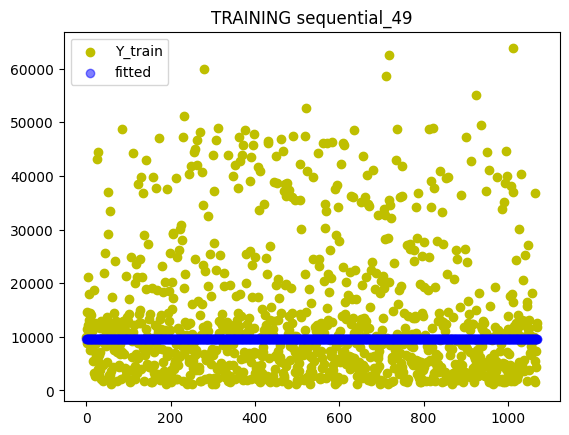

34/34 [==============================] - 0s 1ms/step


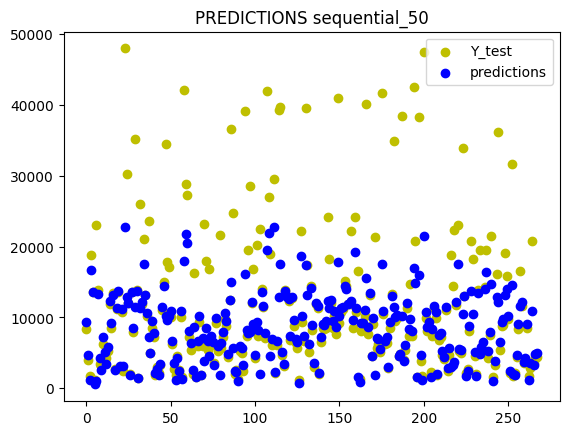

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_163 (Dense)           (None, 124)               1488      
                                                                 
 dense_164 (Dense)           (None, 10)                1250      
                                                                 
 dense_165 (Dense)           (None, 1)                 11        
                                                                 
Total params: 2,749
Trainable params: 2,749
Non-trainable params: 0
_________________________________________________________________


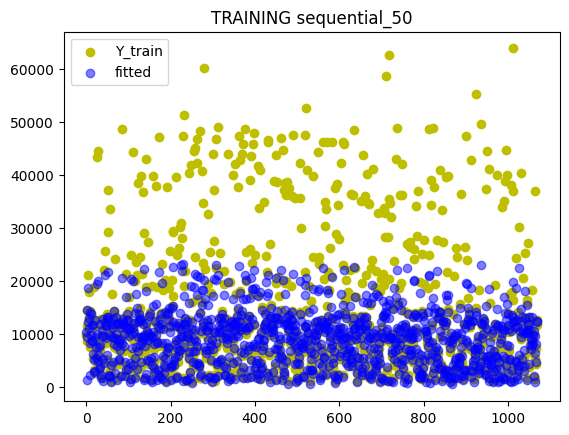

34/34 [==============================] - 0s 937us/step


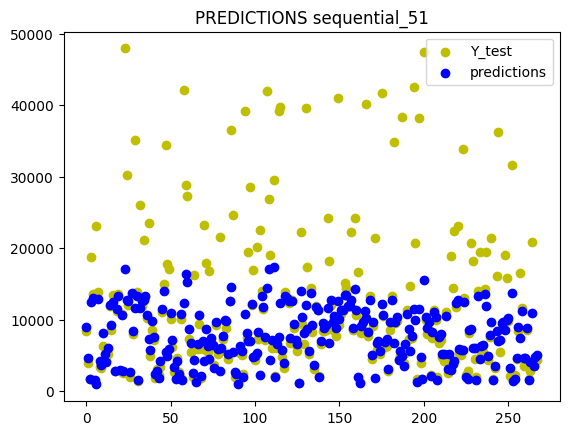

Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_166 (Dense)           (None, 124)               1488      
                                                                 
 dense_167 (Dense)           (None, 10)                1250      
                                                                 
 dense_168 (Dense)           (None, 1)                 11        
                                                                 
Total params: 2,749
Trainable params: 2,749
Non-trainable params: 0
_________________________________________________________________


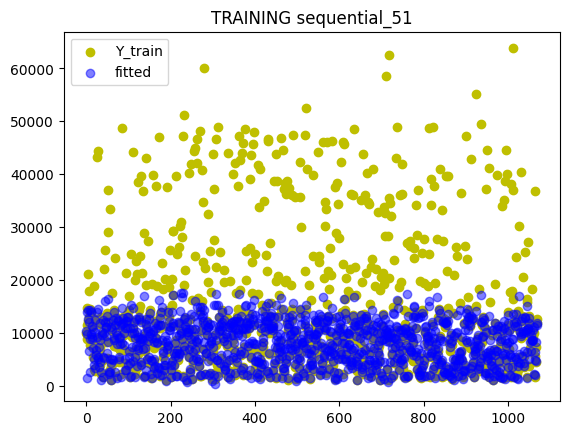

34/34 [==============================] - 0s 1ms/step


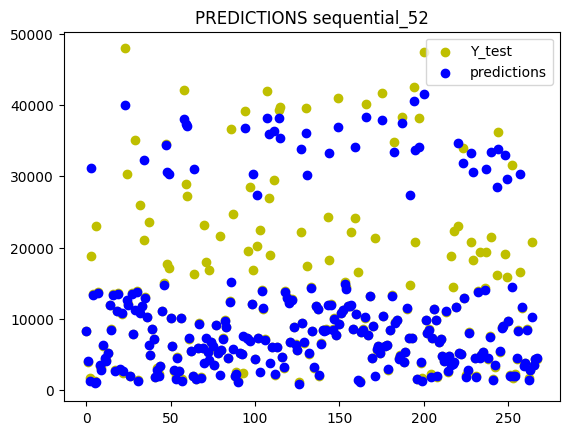

Model: "sequential_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_169 (Dense)           (None, 512)               6144      
                                                                 
 dense_170 (Dense)           (None, 124)               63612     
                                                                 
 dense_171 (Dense)           (None, 1)                 125       
                                                                 
Total params: 69,881
Trainable params: 69,881
Non-trainable params: 0
_________________________________________________________________


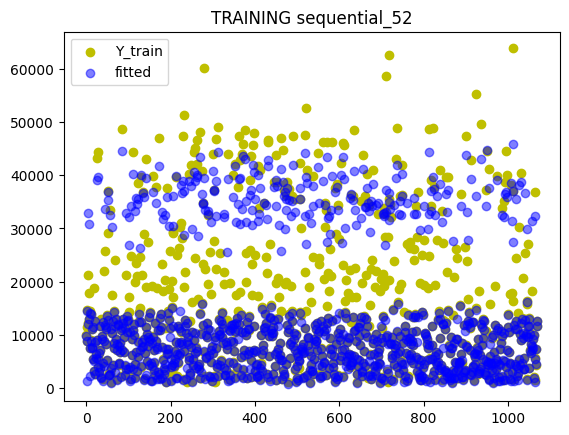

In [425]:
plot_labels(model_insurance_10)
plot_labels(model_insurance_11)
plot_labels(model_insurance_12)
plot_labels(model_insurance_13)
plot_labels(model_insurance_14)



In [426]:
model_insurance_14.evaluate(X_test,Y_test)

9/9 [==============================] - 0s 1ms/step - loss: 2977.3176 - mae: 2977.3176


[2977.317626953125, 2977.317626953125]

#### History
Plot history also known as loss curve or a training curve


Text(0.5, 0, 'epoch')

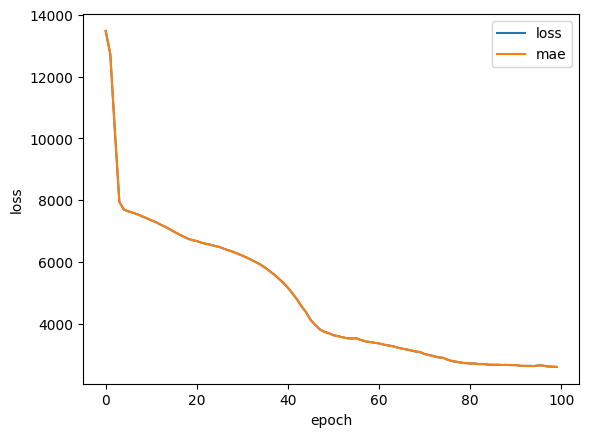

In [427]:
pd.DataFrame(history_14.history).plot()
plt.ylabel("loss")
plt.xlabel("epoch")

### Preprocessing data (normalization and standardization)
This step can improve the model because this get data ready to turn into tensors

1. turn all data into numbers (NN can't handle strings)
2. Make sure all of the tensors are in the right shape
3. **Scale features** (normalize or standardize, NN tend to prefer normalization)

Normalization change values in a dataset to a common scale, without distorting diffrence in range values.

[Article on scale,standardize, normalize](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02)


In [428]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


For example age goes from 19 to 70, bmi goes from 16 to 55 etc
<br>
<img src="stuff/scaling.png" height = 600>
</br>

(array([[<AxesSubplot: title={'center': 'age'}>]], dtype=object),
 array([[<AxesSubplot: title={'center': 'bmi'}>]], dtype=object))

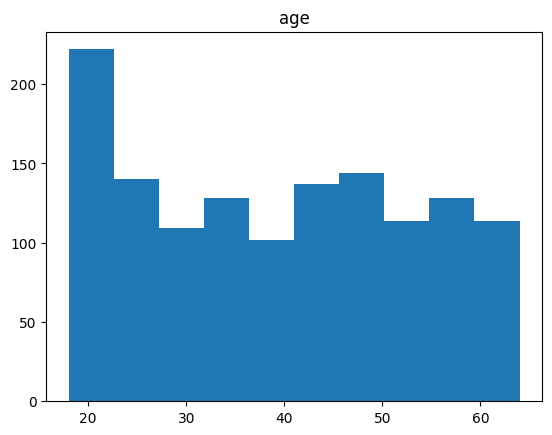

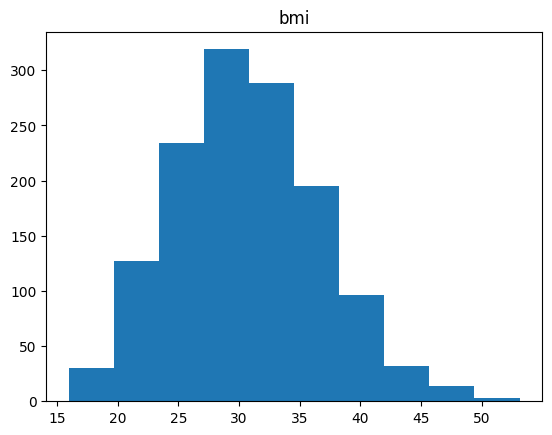

In [429]:
X.hist("age", grid=0), X.hist("bmi", grid=0)
#thy are of different scale

In [430]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

So let's start fresh an import thi library
**from sklearn.compose import make_column_transformer**


In [431]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [432]:
print(insurance.head())
print(insurance.describe())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [433]:
#create a column transformer
ct= make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex","smoker","region"])
)

#Create the new  features and labels
X = insurance.drop("charges",axis=1)
Y = insurance["charges"]

# Now create the 2 sets trainig and test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, shuffle=True, random_state=888)
X_train.shape, Y_test.shape

((1070, 6), (268,))

Fit the columtrasformer to our training data
must trasform first the trainig data and then then test data
They must be separated, avoiding to transfer **information** from the future (the test data)

In [434]:
ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)
print(type(X_train_normal))
print(X_train_normal.shape)
X_train_normal[:5]


<class 'numpy.ndarray'>
(1070, 11)


array([[0.69565217, 0.38081786, 0.2       , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ],
       [0.7173913 , 0.25396825, 0.        , 0.        , 1.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        1.        ],
       [0.89130435, 0.44215765, 0.6       , 1.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.48210923, 0.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        ],
       [0.76086957, 0.13290288, 0.        , 0.        , 1.        ,
        0.        , 1.        , 0.        , 0.        , 1.        ,
        0.        ]])

Now let's buld a NN on it

In [435]:
tf.random.set_seed(888)

model_insurance_norm_14 = tf.keras.Sequential([
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(124, activation="relu"),
    tf.keras.layers.Dense(1)
]
)
model_insurance_norm_14.compile(
    loss= tf.keras.losses.mae,
    optimizer= tf.keras.optimizers.Adam(),
    metrics= ["mae"]
)

In [436]:

history_14_norm = model_insurance_norm_14.fit(X_train_normal,Y_train  ,epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 13578.7324 - mae: 13578.7324
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13496.3096 - mae: 13496.3096
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13145.5898 - mae: 13145.5898
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12252.9834 - mae: 12252.9834
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10756.5957 - mae: 10756.5957
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9286.4893 - mae: 9286.4893
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8447.7510 - mae: 8447.7510
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 8162.7944 - mae: 8162.7944
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7994.3252 - mae: 7994.3252
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7837.2559 - mae:

In [437]:
def plot_labels_normal(model_x ):
    predicted = model_x.predict(X_test_normal)
    fitted = model_x.predict(X_train_normal)
    plt.title(f"PREDICTIONS {model_x.name}")
    plt.scatter(np.arange(0,len(Y_test)), Y_test, c='y' , label = 'Y_test')
    plt.scatter(np.nonzero(predicted)[0], predicted, c='b' , label = 'predictions', alpha=0.5)
    plt.legend()
    plt.show()
    model_x.summary()
    plt.title(f"TRAINING {model_x.name}")
    plt.scatter(np.arange(0,len(Y_train)), Y_train, c='y' ,label = 'Y_train')
    plt.scatter(np.nonzero(fitted)[0], fitted, c='b' , label = 'fitted', alpha=0.5)
    plt.legend()
    plt.show()

34/34 [==============================] - 0s 1ms/step


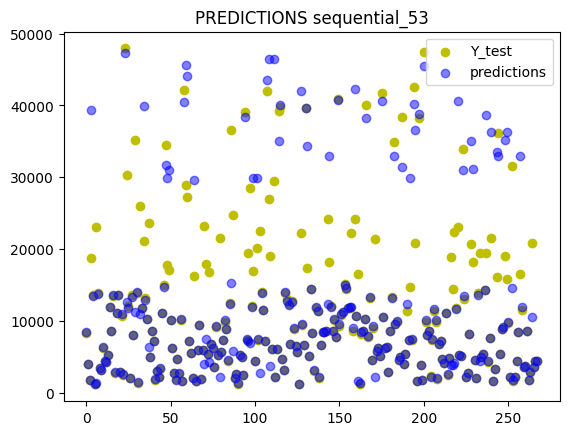

Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_172 (Dense)           (None, 512)               6144      
                                                                 
 dense_173 (Dense)           (None, 124)               63612     
                                                                 
 dense_174 (Dense)           (None, 1)                 125       
                                                                 
Total params: 69,881
Trainable params: 69,881
Non-trainable params: 0
_________________________________________________________________


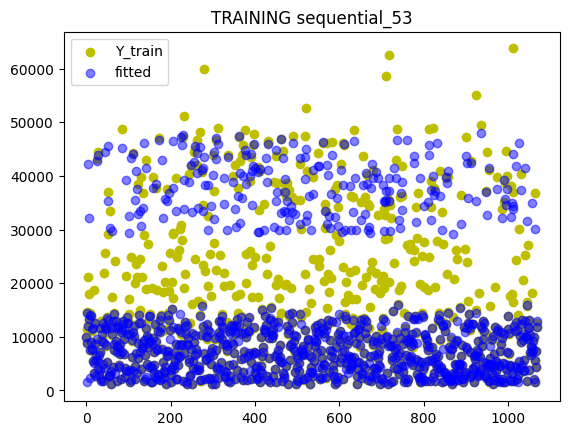

In [438]:
plot_labels_normal(model_insurance_norm_14)

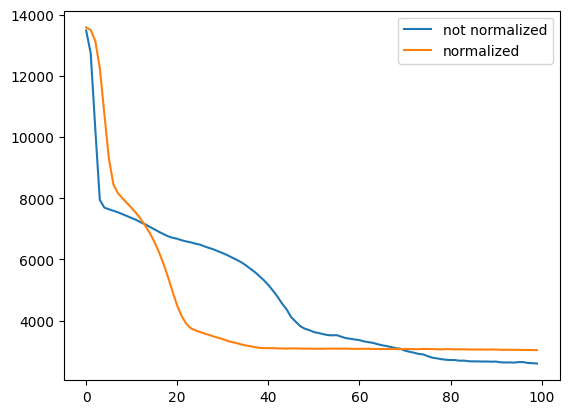

In [439]:
plt.plot(np.array(history_14.history.get("loss")), label="not normalized")
plt.plot(np.array(history_norm_14.history.get("loss")), label = "normalized")
plt.legend()

In [440]:
model_insurance_norm_14.evaluate(X_test_normal,Y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3279.0989 - mae: 3279.0989


[3279.098876953125, 3279.098876953125]

So, the normalize dataset **converged more quickly**
But **not guarantee a better result**

### F. let's go with a 4 Dense layers

In [441]:
tf.random.set_seed(888)

model_insurance_norm_15 = tf.keras.Sequential([
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(124, activation="relu"),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(1)
]
)
model_insurance_norm_15.compile(
    loss= tf.keras.losses.mae,
    optimizer= tf.keras.optimizers.Adam(),
    metrics= ["mae"]
)

In [442]:
history_15_norm = model_insurance_norm_15.fit(X_train_normal,Y_train  ,epochs=400)

Epoch 1/400
34/34 [==============================] - 0s 2ms/step - loss: 13543.3799 - mae: 13543.3799
Epoch 2/400
34/34 [==============================] - 0s 2ms/step - loss: 11893.7959 - mae: 11893.7959
Epoch 3/400
34/34 [==============================] - 0s 2ms/step - loss: 8290.0928 - mae: 8290.0928
Epoch 4/400
34/34 [==============================] - 0s 2ms/step - loss: 7613.4834 - mae: 7613.4834
Epoch 5/400
34/34 [==============================] - 0s 2ms/step - loss: 6727.5190 - mae: 6727.5190
Epoch 6/400
34/34 [==============================] - 0s 2ms/step - loss: 5216.3823 - mae: 5216.3823
Epoch 7/400
34/34 [==============================] - 0s 2ms/step - loss: 3871.6055 - mae: 3871.6055
Epoch 8/400
34/34 [==============================] - 0s 2ms/step - loss: 3409.8333 - mae: 3409.8333
Epoch 9/400
34/34 [==============================] - 0s 2ms/step - loss: 3221.9377 - mae: 3221.9377
Epoch 10/400
34/34 [==============================] - 0s 2ms/step - loss: 3166.3933 - mae: 3166.

In [443]:
X_train_2nd_test = pd.get_dummies(X_train)
X_test_2nd_test = pd.get_dummies(X_test)
X_test_2nd_test

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1121,46,38.170,2,0,1,1,0,0,0,1,0
671,29,31.160,0,1,0,1,0,1,0,0,0
121,18,23.750,0,0,1,1,0,1,0,0,0
1011,43,20.130,2,0,1,0,1,0,0,1,0
894,62,32.110,0,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
108,29,27.940,0,0,1,1,0,0,0,1,0
382,55,33.000,0,0,1,1,0,0,0,1,0
212,24,28.500,2,0,1,1,0,0,1,0,0
2,28,33.000,3,0,1,1,0,0,0,1,0


In [444]:
tf.random.set_seed(888)

model_insurance_15 = tf.keras.Sequential([
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(124, activation="relu"),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(1)
]
)
model_insurance_15.compile(
    loss= tf.keras.losses.mae,
    optimizer= tf.keras.optimizers.Adam(),
    metrics= ["mae"]
)

In [445]:
history_15 = model_insurance_15.fit(X_train_2nd_test,Y_train  ,epochs=400)

Epoch 1/400
34/34 [==============================] - 1s 3ms/step - loss: 13100.1934 - mae: 13100.1934
Epoch 2/400
34/34 [==============================] - 0s 2ms/step - loss: 8536.9111 - mae: 8536.9111
Epoch 3/400
34/34 [==============================] - 0s 4ms/step - loss: 7582.1226 - mae: 7582.1226
Epoch 4/400
34/34 [==============================] - 0s 3ms/step - loss: 7444.1919 - mae: 7444.1919
Epoch 5/400
34/34 [==============================] - 0s 2ms/step - loss: 7235.2852 - mae: 7235.2852
Epoch 6/400
34/34 [==============================] - 0s 2ms/step - loss: 7052.3975 - mae: 7052.3975
Epoch 7/400
34/34 [==============================] - 0s 3ms/step - loss: 6866.1641 - mae: 6866.1641
Epoch 8/400
34/34 [==============================] - 0s 2ms/step - loss: 6769.4189 - mae: 6769.4189
Epoch 9/400
34/34 [==============================] - 0s 3ms/step - loss: 6675.0098 - mae: 6675.0098
Epoch 10/400
34/34 [==============================] - 0s 3ms/step - loss: 6600.7949 - mae: 6600.79

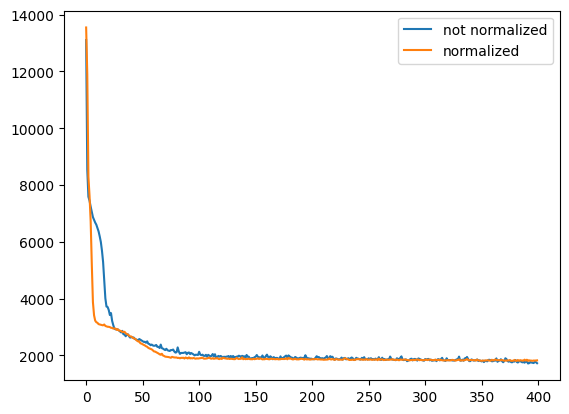

In [446]:
plt.plot(np.array(history_15.history.get("loss")), label="not normalized")
plt.plot(np.array(history_15_norm.history.get("loss")), label = "normalized")
plt.legend()

34/34 [==============================] - 0s 2ms/step


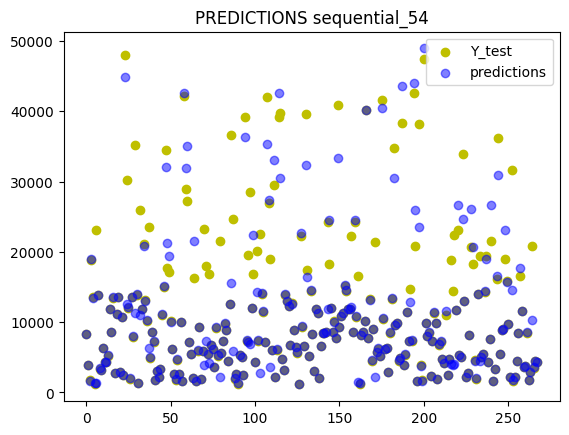

Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_175 (Dense)           (None, 512)               6144      
                                                                 
 dense_176 (Dense)           (None, 124)               63612     
                                                                 
 dense_177 (Dense)           (None, 512)               64000     
                                                                 
 dense_178 (Dense)           (None, 1)                 513       
                                                                 
Total params: 134,269
Trainable params: 134,269
Non-trainable params: 0
_________________________________________________________________


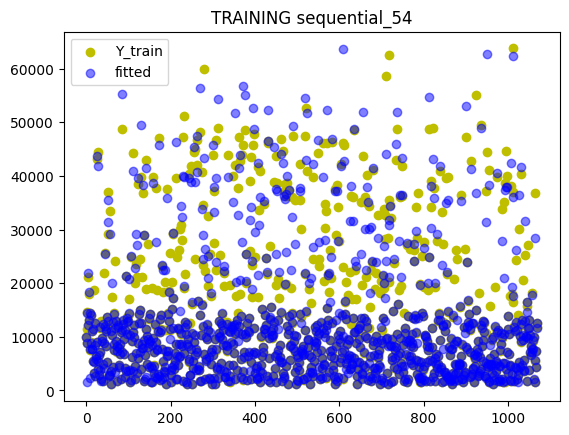

In [447]:
plot_labels_normal(model_insurance_norm_15)

34/34 [==============================] - 0s 2ms/step


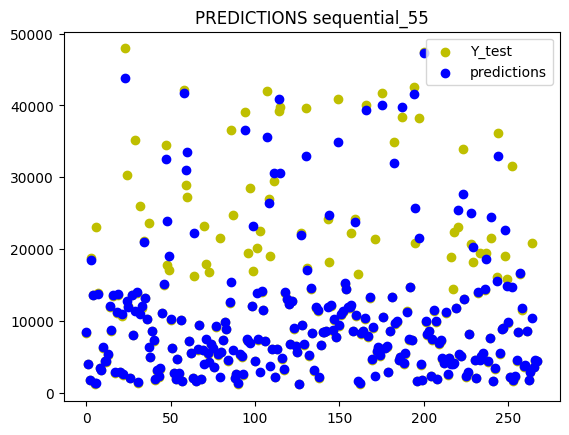

Model: "sequential_55"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_179 (Dense)           (None, 512)               6144      
                                                                 
 dense_180 (Dense)           (None, 124)               63612     
                                                                 
 dense_181 (Dense)           (None, 512)               64000     
                                                                 
 dense_182 (Dense)           (None, 1)                 513       
                                                                 
Total params: 134,269
Trainable params: 134,269
Non-trainable params: 0
_________________________________________________________________


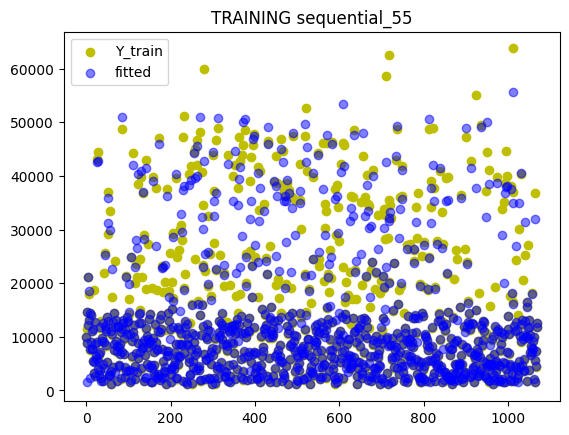

In [448]:
#save the prev sata
X_test_saved = X_test
X_train_saved = Y_test
X_test = X_test_2nd_test
X_train = X_train_2nd_test
#plot
plot_labels(model_insurance_15)

In [449]:
X_test = X_test_2nd_test
X_train = X_train_2nd_test


In [450]:
print(model_insurance_norm_15.evaluate(X_test_normal,Y_test,verbose=0)[0])
print(model_insurance_15.evaluate(X_test,Y_test,verbose=0)[0])


2161.7177734375
2102.672119140625


## Lets plot few graphs

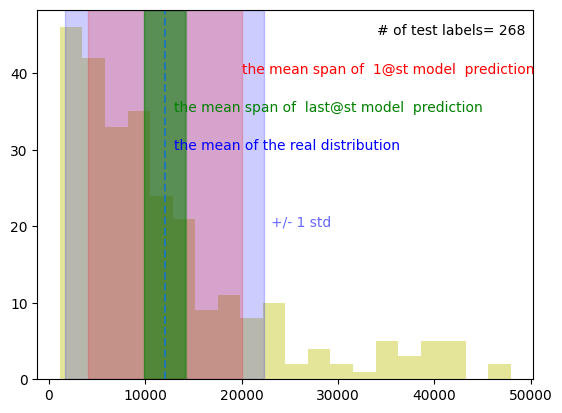

In [451]:
Y_test_mean=int(Y_test.mean())
Y_test_std=int(Y_test.std())

plt.hist(Y_test, bins=20, alpha=0.4, color='y')
plt.axvline(Y_test_mean, linestyle = '--')
plt.text(20000, 40, "the mean span of  1@st model  prediction", color='r')
plt.text(13000, 30, "the mean of the real distribution", color='b')
plt.text(34000, 45, f"# of test labels= {len(Y_test)}")
plt.text(23000, 20, "+/- 1 std ", color='b', alpha=0.6)
plt.axvspan( Y_test_mean - Y_test_std,Y_test_mean+Y_test_std, color='b', alpha=0.2 )
plt.axvspan( Y_test_mean - 8009,Y_test_mean+8009, color='r', alpha=0.2 )
plt.axvspan( Y_test_mean - 2161,Y_test_mean+2161, color='g', alpha=0.3 )
plt.axvspan( Y_test_mean - 2102,Y_test_mean+2102, color='g', alpha=0.4 )
plt.text(13000, 35, "the mean span of  last@st model  prediction", color='g')

plt.show()